In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [55]:
in_path = "final_data/outputs/parsed/param_que_synth_11_8_21.json"
out_path = "final_data/outputs/parsed/param_que_synth_11_8_21.csv"

In [56]:
f = open(in_path, "r")

In [57]:
data = json.load(f)

In [58]:
data = pd.DataFrame(data["data"])

In [59]:
# data['likelihood_proper'] = np.exp(-data['likelihood'])
data["configuration"] = [f"{a}_{b}_{c}" for a,b,c in zip(data["alpha_q"], data["alpha_a"], data["beta"])]
data.set_index("configuration", inplace=True)
data

questionerType  alpha_q  alpha_a  beta  likelihood
configuration                                                   
3_1_0.5            pragmatic        3        1   0.5 -138.115144
3_1_0.5             explicit        3        1   0.5 -139.899518
3_1_0.1            pragmatic        3        1   0.1 -138.370025
3_1_0.1             explicit        3        1   0.1 -140.302376
3_1_1.5            pragmatic        3        1   1.5 -137.289846
...                      ...      ...      ...   ...         ...
19_7_1.5            explicit       19        7   1.5  -93.791002
19_7_2.0           pragmatic       19        7   2.0  -88.853654
19_7_2.0            explicit       19        7   2.0  -93.749903
19_7_2.5           pragmatic       19        7   2.5  -88.905348
19_7_2.5            explicit       19        7   2.5  -93.713675

[1190 rows x 5 columns]

In [60]:
data.to_csv(out_path)

In [61]:
sns.kdeplot("likelihood" , hue="answererType", data=data)
# sns.kdeplot("likelihood" , hue="questionerType", data=data)

ValueError: Could not interpret value `answererType` for parameter `hue`

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

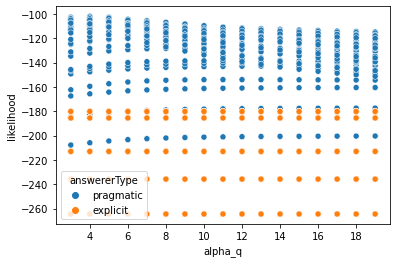

In [72]:
sns.scatterplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
# sns.scatterplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_q', ylabel='likelihood'>

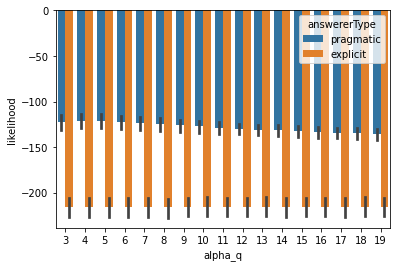

In [73]:
sns.barplot(x="alpha_q", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="alpha_q", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='alpha_a', ylabel='likelihood'>

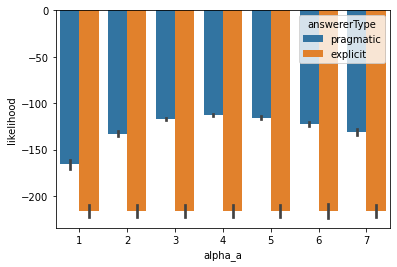

In [74]:
sns.barplot(x="alpha_a", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="alpha_a", y="likelihood", hue="questionerType", data=data)

<AxesSubplot:xlabel='beta', ylabel='likelihood'>

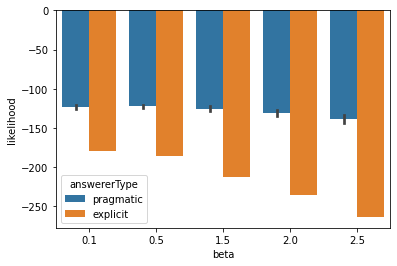

In [75]:
sns.barplot(x="beta", y="likelihood", hue="answererType", data=data)
# sns.barplot(x="beta", y="likelihood", hue="questionerType", data=data)

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alpha_q', ylabel='count'>

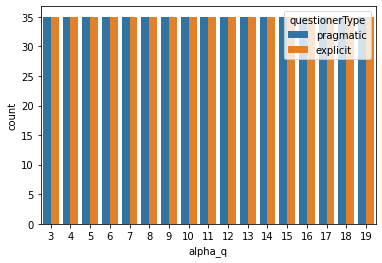

In [16]:
# sns.countplot("alpha_q" , hue="answererType", data=data)
sns.countplot("alpha_q" , hue="questionerType", data=data)

In [17]:
# sns.countplot("alpha_a" , hue="answererType", data=data)

In [18]:
# sns.countplot("beta" , hue="answererType", data=data)

In [19]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(x="alpha_q", y="alpha_a", size="likelihood", hue="beta", data=data[data.answererType=="pragmatic"])

In [50]:
scatter = data[data.answererType=='pragmatic'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

# scatter = data[data.questionerType=='explicit'].groupby(["alpha_q", "alpha_a"]).agg({"likelihood":"mean"}).reset_index()  

In [51]:
scatter = scatter.pivot("alpha_a", "alpha_q", "likelihood")
scatter

alpha_q          3           4           5           6           7   \
alpha_a                                                               
1       -166.508854 -163.232557 -160.509815 -158.345587 -156.646670   
2       -128.932216 -123.444474 -119.134285 -115.850672 -113.350287   
3       -103.452471  -96.904046  -92.165707  -88.783666  -86.335995   
4        -88.029012  -81.122569  -76.537237  -73.489397  -71.416787   
5        -79.492038  -72.378995  -67.970360  -65.231161  -63.498833   
6        -75.194115  -67.725040  -63.320505  -60.760365  -59.272643   
7        -73.446050  -65.396033  -60.835533  -58.359150  -57.046783   

alpha_q          8           9           10          11          12  \
alpha_a                                                               
1       -155.305037         NaN         NaN         NaN         NaN   
2       -109.230245 -109.901245 -108.686106 -107.697237 -106.880260   
3        -84.522848  -83.147787  -82.082306  -81.240527  -80.563715   
4        -69.968859  -68.932115  -68.173223  -67.606345  -67.174884   
5        -62.382644  -61.653390  -61.172429  -60.853503  -60.641952   
6        -58.413001  -57.929441  -57.674195  -57.558238  -57.527265   
7        -56.386797  -56.101056  -56.030896  -56.082962  -56.202039   

alpha_q          13          14          15          16          17  \
alpha_a                                                               
1               NaN         NaN         NaN         NaN         NaN   
2       -106.196026 -105.615897 -105.118620 -104.688213 -104.312508   
3        -80.010864  -79.552822  -79.168523  -78.842510  -78.563278   
4        -66.840802  -66.578097  -66.368698  -66.199835  -66.062328   
5        -60.502661  -60.412767  -60.357167  -60.325720  -60.311497   
6        -57.547965  -57.599805  -57.670043  -57.750703  -57.836737   
7        -56.355684  -56.525027  -56.699214  -56.872093  -57.040243   

alpha_q          18          19  
alpha_a                          
1               NaN         NaN  
2       -103.982135 -103.689795  
3        -78.322139  -78.112439  
4        -65.949465  -65.856249  
5        -60.309668  -60.316804  
6        -57.924912  -58.013127  
7        -57.201827  -57.355917

In [52]:
def true_point(x,y):
    x = x-2.5
    y = y-0.5
    return (x,y)

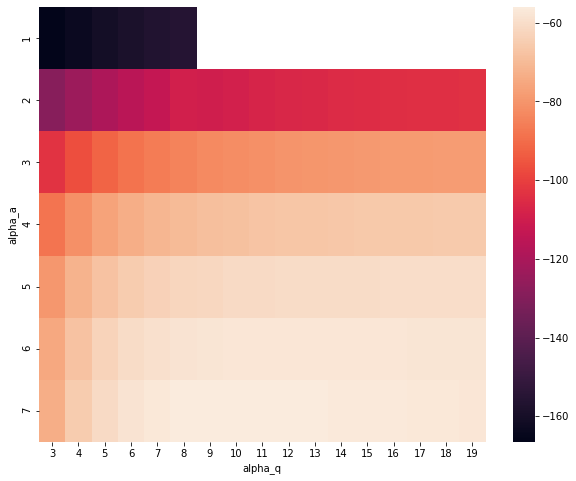

In [54]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(ylim = (1,7), xlim = (3,19))
sns.heatmap(scatter, ax=ax)
x, y = true_point(11, 8)
plt.plot(x, y, "ro")

/Users/aditya/.pyenv/versions/3.8.6/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


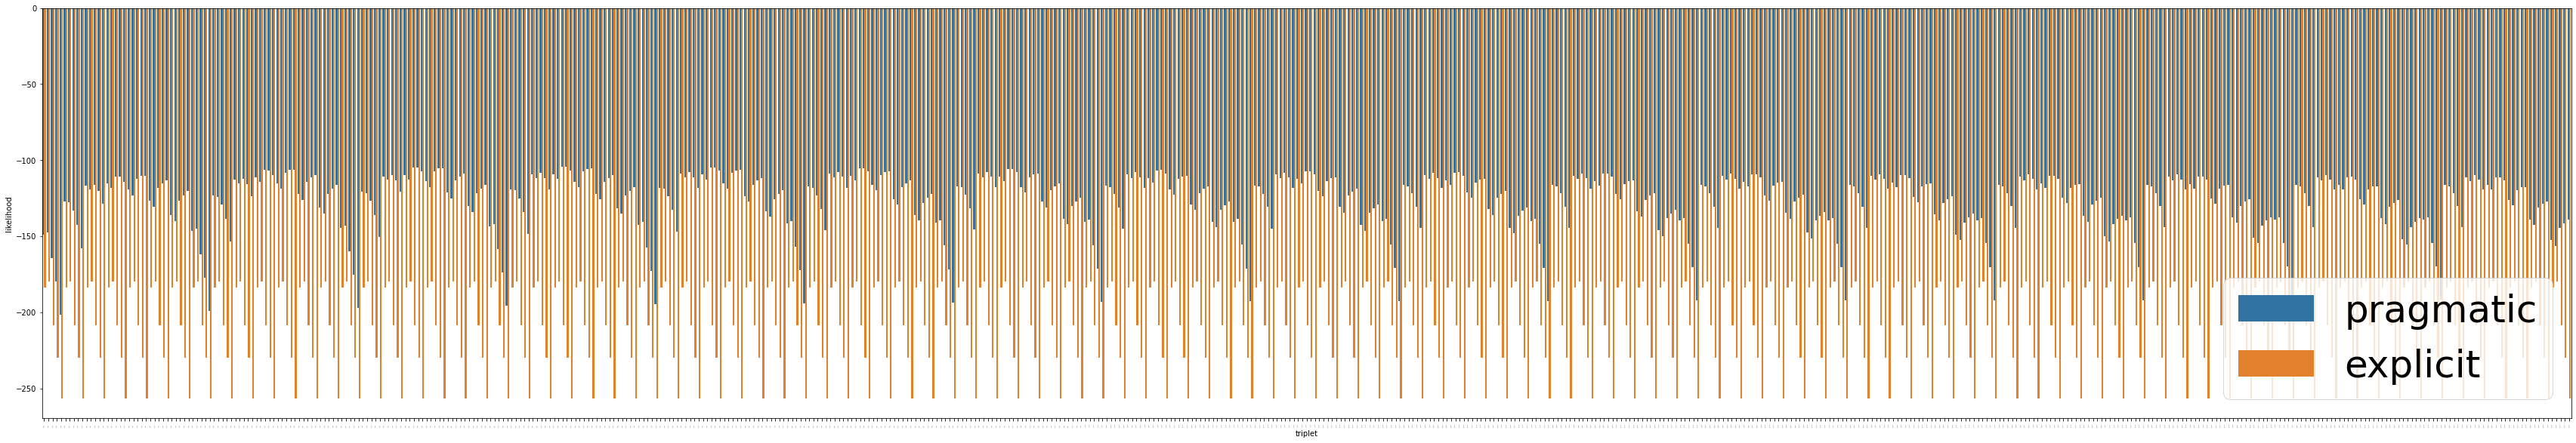

In [52]:
plt.figure(figsize=(60,10))
sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data)
plt.xticks(rotation=90, size=0)
plt.legend(prop={'size':50})
plt.show()

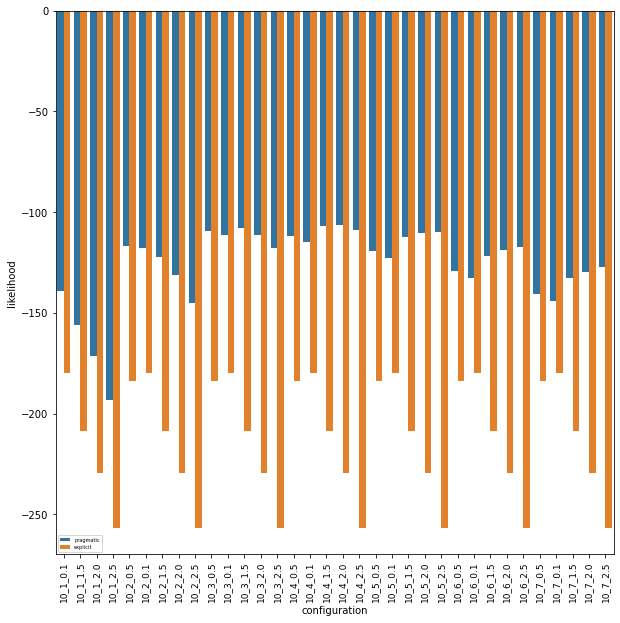

In [53]:
subset = data.loc["10_1_0.1":"10_7_2.5"]
plt.figure(figsize=(10,10))
sns.barplot(x=subset.index, y="likelihood", hue="answererType", data=subset)
plt.xticks(rotation=90, size=9)
plt.legend(prop={'size':5})
plt.show()

In [54]:
data[data.likelihood==max(data['likelihood'])]

answererType  alpha_q  alpha_a  beta  likelihood  triplet
configuration                                                          
6_4_1.5          pragmatic        6        4   1.5 -104.409213  6_4_1.5

In [55]:
# plt.figure(figsize=(50,10))
# sns.barplot(x="triplet", y="likelihood", hue="answererType", data=data[data.answererType=='pragmatic'])
# plt.xticks(rotation=90, size=10)
# plt.show()